In [2]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import img_to_array, load_img
from keras.applications.vgg16 import preprocess_input, VGG16, decode_predictions
import datetime

In [3]:
FACES_DIR = '../Data/01_raw/Faces/'

In [4]:
faces = os.listdir(FACES_DIR)

In [5]:
faces_df = pd.DataFrame(columns=['address'],data = faces)

In [6]:
faces_df['number'] = faces_df['address'].apply(lambda x: int(x.split('_')[-1].split('.')[0]))

In [7]:
faces_df['name'] = faces_df['address'].apply(lambda x: ' '.join(x.split('_')[:-1]))

In [8]:
faces_value_counts = faces_df['name'].value_counts()

In [9]:
faces_df['train_set'] = faces_df['name'].isin(
    np.random.permutation(faces_value_counts.index)[:int(0.7*len(faces_value_counts))]
)

In [11]:
df_input = faces_df[faces_df['train_set']].drop('train_set', axis=1)

In [12]:
df_validation = faces_df[~faces_df['train_set']].drop('train_set', axis=1)

In [13]:

# load model
model = VGG16()

Metal device set to: Apple M1


2022-06-12 23:15:42.652610: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-12 23:15:42.652804: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
model = keras.Model(inputs=model.inputs, outputs=model.layers[-1].output)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
def predict_vgg(im_url, pref=FACES_DIR):
    image = load_img(FACES_DIR + im_url, target_size=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, *image.shape))
    image = preprocess_input(image)
    if np.random.random() < 0.005:
        print(f'Iteration 200 - time: {datetime.datetime.now().strftime("%H:%M:%S")}')
    return model.predict(image, verbose = False)[0]

In [26]:
df_input['vgg_features'] = df_input['address'].apply(predict_vgg)
df_validation['vgg_features'] = df_validation['address'].apply(predict_vgg)

Iteration 200 - time: 23:19:26
Iteration 200 - time: 23:19:31
Iteration 200 - time: 23:19:56
Iteration 200 - time: 23:20:05
Iteration 200 - time: 23:20:09
Iteration 200 - time: 23:20:20
Iteration 200 - time: 23:20:23
Iteration 200 - time: 23:20:24
Iteration 200 - time: 23:20:39
Iteration 200 - time: 23:20:39
Iteration 200 - time: 23:20:44
Iteration 200 - time: 23:20:59
Iteration 200 - time: 23:21:08
Iteration 200 - time: 23:21:33
Iteration 200 - time: 23:21:56
Iteration 200 - time: 23:21:57
Iteration 200 - time: 23:21:57
Iteration 200 - time: 23:22:33
Iteration 200 - time: 23:22:38
Iteration 200 - time: 23:22:40
Iteration 200 - time: 23:22:44
Iteration 200 - time: 23:22:57
Iteration 200 - time: 23:23:14
Iteration 200 - time: 23:23:18
Iteration 200 - time: 23:23:20
Iteration 200 - time: 23:23:26
Iteration 200 - time: 23:23:41
Iteration 200 - time: 23:23:56
Iteration 200 - time: 23:24:08
Iteration 200 - time: 23:24:11
Iteration 200 - time: 23:24:15
Iteration 200 - time: 23:24:32
Iteratio

In [40]:
len_vgg = len(df_input.iloc[0,-1][0])

In [45]:
df_input[
    [f'vgg_{i}' for i in range(len_vgg)]
] = [list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1026947476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[[f'vgg_{i}' for i in range(len_vgg)]]=[list(x) for x in df_input['vgg_features'].apply(lambda x: x[0]).values]
/var/folders/sy/55_grszs60j_67x7hfzqk8

In [47]:
df_input.drop('vgg_features',axis=1,inplace=True)

In [48]:
df_input.to_parquet('../data/02_intermediate/train_vgg')

In [49]:
df_validation[
    [f'vgg_{i}' for i in range(len_vgg)]
] = [list(x) for x in df_validation['vgg_features'].apply(lambda x: x[0]).values]

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_validation[
/var/folders/sy/55_grszs60j_67x7hfzqk8800000gn/T/ipykernel_56235/1604630687.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

In [50]:
df_validation.drop('vgg_features',axis=1,inplace=True)

In [51]:
df_validation.to_parquet('../data/02_intermediate/test_vgg')

# Model fitting

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import img_to_array, load_img
from keras.applications.vgg16 import preprocess_input, VGG16, decode_predictions
import datetime

In [2]:
tf.config.set_visible_devices([], 'GPU')

In [3]:
df_input = pd.read_parquet('../data/04_model_input/train')
df_validation = pd.read_parquet('../data/04_model_input/cv')

In [20]:
def generate_indices(n):
    i = n
    j = n-1
    yield i,j
    while True:
        if j > 0:
            i = i-1
            j = j-1
        else:
            if i < n:
                j = n-i-1
                i = n
            else:
                i = n
                j = n-1
        yield i,j

In [22]:
def generate_data_df(df=df_input, n_sample=100, mult_sim = 20):

    n_items = len(df)
    index_gen = generate_indices(n_items-1)
    df = df.copy()
    df.drop(['address','number'],axis=1,inplace=True)
    while True:
        inds_1, inds_2 = [],[]
        for i in range(n_sample):
            ind_1, ind_2 = next(index_gen)
            inds_1+=[ind_1]
            inds_2+=[ind_2]
        vals_1 = df.iloc[inds_1].values
        vals_2 = df.iloc[inds_2].values
        yield (
            np.concatenate([vals_1[:,1:],vals_2[:,1:]],axis=1).astype('float32'),
            (vals_1[:,0]==vals_2[:,0]).astype(int)
        )

In [28]:

generator = generate_data_df(df_input, 10)

In [30]:
x,y = next(generator)

In [31]:
input_faces = keras.Input(shape = (x.shape[1]))

In [32]:
dense_1 = layers.Dense(10, activation='relu')(input_faces)
dropout = layers.Dropout(0.3)(dense_1)
dense_2 = layers.Dense(10, activation='relu')(dropout)
predictions = layers.Dense(1, activation='sigmoid')(dense_2)

In [33]:
model = keras.Model(inputs=input_faces, outputs=predictions)

In [34]:
model.compile(
  'adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [35]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8192)]            0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 82,051
Trainable params: 82,051
Non-trainable params: 0
_________________________________________________________________


In [36]:
data_generator = generate_data_df(n_sample=10000,mult_sim=100)

In [37]:
val_generator = generate_data_df(df=df_validation, n_sample=8000,mult_sim=100)
val_data = next(val_generator)

In [38]:
loss_train = []
loss_cv = []

In [39]:
n_roll = 10

In [40]:
def rollmean(arr, n):
    arr_roll = np.copy(arr)
    for i in range(n):
        arr_roll = arr_roll[1:]+arr[:-i-1]
    return arr_roll/n

In [ ]:
for i in range(1000):
    if i%10 == 0:
        print(f'Iteration: {i} - time: {datetime.datetime.now().strftime("%H:%M:%S")}')
    if i % 9 == 8:
        val_data = next(val_generator)
    x,y = next(data_generator)
    model_fit = model.fit(
        x = x,
        y = y,
        validation_data=val_data,
        use_multiprocessing=True,
        verbose=True#i%5==0,
    )
    loss_train += model_fit.history["loss"]
    loss_cv += model_fit.history["val_loss"]
    loss_cv_roll = [0] if len(loss_cv)-1 < n_roll else rollmean(loss_cv,n_roll)
    loss_train_roll = [0] if len(loss_train)-1 < n_roll else rollmean(loss_train,n_roll)
    #if i%5 == 0 and len(loss_cv) > n_roll+2:
    #    print(f'Loss CV: {loss_cv[-1]} - Loss train: {loss_train[-1]}')
    if len(loss_cv_roll) - np.argmin(loss_cv_roll) > 20:
        break

Iteration: 0 - time: 00:58:28


2022-06-14 00:58:40.139103: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


681/681 [==============================] - 1s 1ms/step - loss: 0.6897 - accuracy: 0.5464 - val_loss: 0.6803 - val_accuracy: 0.5911
Iteration: 10 - time: 01:02:25
752/752 [==============================] - 1s 1ms/step - loss: 0.6792 - accuracy: 0.5902 - val_loss: 0.6766 - val_accuracy: 0.5911


In [22]:
loss_train_roll = rollmean(loss_train, 2)
loss_cv_roll = rollmean(loss_cv, 2)

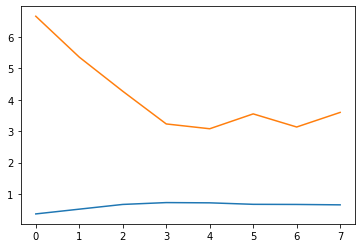

In [24]:
fig, ax = plt.subplots()
ax.plot(loss_train_roll)
ax.plot(loss_cv_roll)